# **Import Libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import pylab
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df=pd.read_csv('insurance.csv')


In [3]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape


(1338, 7)

In [5]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.sex=df['sex'].astype("category")
df.smoker=df['smoker'].astype("category")
df.region=df['region'].astype("category")

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [12]:
df.describe(include='category').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


# **Getting numeric and categorical columns**

In [9]:
num_cols=df._get_numeric_data().columns.tolist()
print(num_cols)

['age', 'bmi', 'children', 'charges']


In [10]:
cat_cols=list(set(df.columns)-set(num_cols))
print(cat_cols)

['sex', 'region', 'smoker']


In [13]:
df['sex'].value_counts()


male      676
female    662
Name: sex, dtype: int64

# **Outliers**

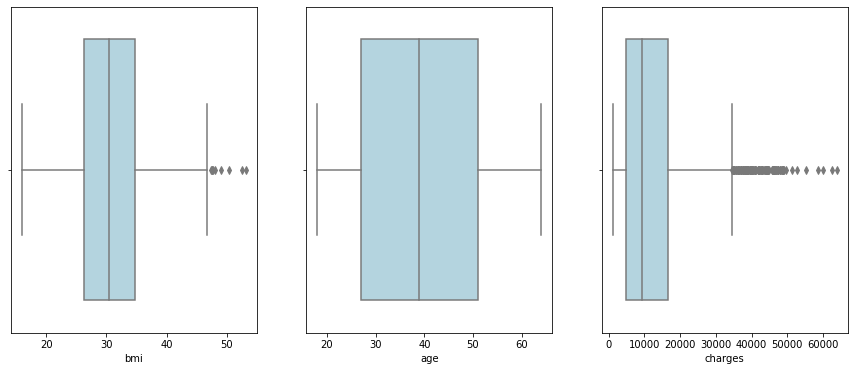

In [15]:
fig, axes=plt.subplots(figsize=(15, 6), nrows=1, ncols=3)

sns.boxplot(x=df.bmi, color='lightblue', ax=axes[0])

sns.boxplot(x=df.age, color='lightblue', ax=axes[1])

sns.boxplot(x=df.charges, color='lightblue', ax=axes[2])
plt.show()

In [16]:
df['region'].value_counts(normalize=True)


southeast    0.272048
northwest    0.242900
southwest    0.242900
northeast    0.242152
Name: region, dtype: float64

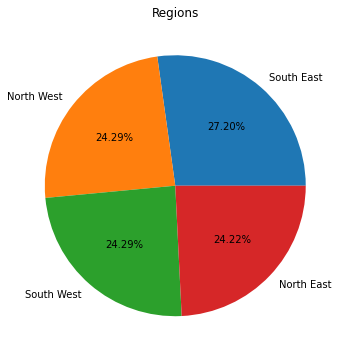

In [17]:
type_value_count = df['region'].value_counts(normalize=True)*100
plt.figure(figsize=(10,6))
plt.pie(type_value_count, labels=['South East','North West','South West','North East'], autopct='%1.2f%%')
plt.title('Regions')
plt.show()

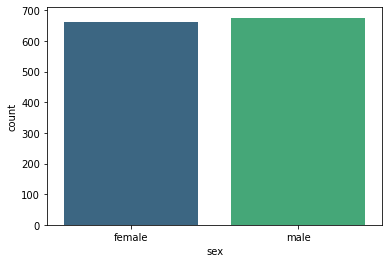

In [18]:
sns.countplot(x='sex', data=df, palette='viridis')
plt.show()

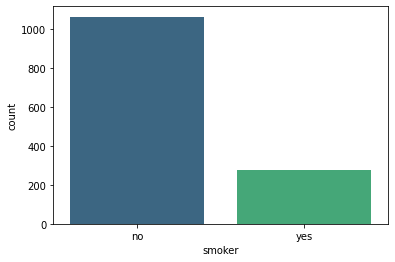

In [19]:
sns.countplot(x='smoker', data=df, palette='viridis')
plt.show()

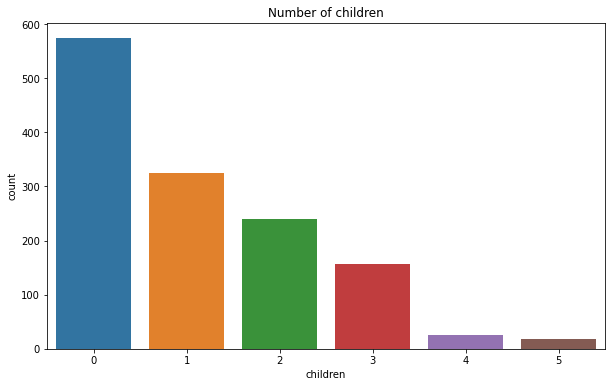

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x='children')
plt.title('Number of children')
plt.show()

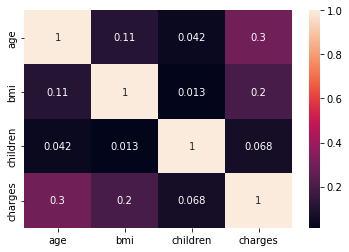

In [21]:
sns.heatmap(df.corr(),annot=True)
plt.show()

# **Machine Learning**

In [23]:
df_encode = pd.get_dummies(data = df, drop_first =True)


In [24]:
X = df_encode.drop('charges',axis=1) 
Y = df_encode['charges'] 

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=23)


# **Linear Regression**

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
thetas = [lin_reg.intercept_]+list(lin_reg.coef_)
print(thetas)

[-11804.709488165672, 245.67927510180044, 351.2448278686227, 545.3420792395372, -172.81017883655497, 24248.086817866963, -560.4299487836605, -1194.098739627291, -1531.2197659313529]


In [28]:
parameter_df = pd.DataFrame({'Parameter': ['theta_'+str(i) for i in range(len(X.columns)+1)],
                            'Columns':['x_0=1']+list(X.columns),
                            'theta': thetas})


In [29]:
parameter_df


,Parameter,Columns,theta
0,theta_0,x_0=1,-11804.709488
1,theta_1,age,245.679275
2,theta_2,bmi,351.244828
3,theta_3,children,545.342079
4,theta_4,sex_male,-172.810179
5,theta_5,smoker_yes,24248.086818
6,theta_6,region_northwest,-560.429949
7,theta_7,region_southeast,-1194.098740
8,theta_8,region_southwest,-1531.219766


In [30]:
Y_train_pred=lin_reg.predict(X_train)


In [31]:
sse = np.sum((Y_train - Y_train_pred)**2)
sst = np.sum((Y_train - Y_train.mean())**2)
R_square = 1 - (sse/sst)
print('R square obtain for train set :',R_square)

R square obtain for train set : 0.7571522017135183


In [32]:
print('R square obtain for scikit learn library is :',r2_score(Y_train, Y_train_pred))

R square obtain for scikit learn library is : 0.7571522017135183


In [33]:
Y_test_pred=lin_reg.predict(X_test)
print(r2_score(Y_test, Y_test_pred))

0.7292924601639752


# **Polynomial Regression**

In [34]:
poly_reg = PolynomialFeatures(degree = 2)
poly_reg.fit(X_train)

PolynomialFeatures()

In [35]:
X_train_poly=poly_reg.transform(X_train)
X_test_poly=poly_reg.transform(X_test)

In [36]:
lr=LinearRegression()
lr.fit(X_train_poly, Y_train)

LinearRegression()

In [37]:
Y_train_poly_pred = lr.predict(X_train_poly)
Y_test_poly_pred = lr.predict(X_test_poly)

In [38]:
print('R square for train data:', r2_score(Y_train, Y_train_poly_pred))
print('R square for test data:', r2_score(Y_test, Y_test_poly_pred))

R square for train data: 0.8523302188458505
R square for test data: 0.8017430202475523
